#### Dataset

In [2]:
# Datset: Mall_Customers.csv
# Location: https://mitu.co.in/dataset

#### Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Read the data

In [6]:
df = pd.read_csv('Mall_Customers.csv')

In [7]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.shape

(200, 5)

#### Separate the input variable

In [10]:
x = df.iloc[:,[3,4]]

In [13]:
x;

In [12]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Explore the data

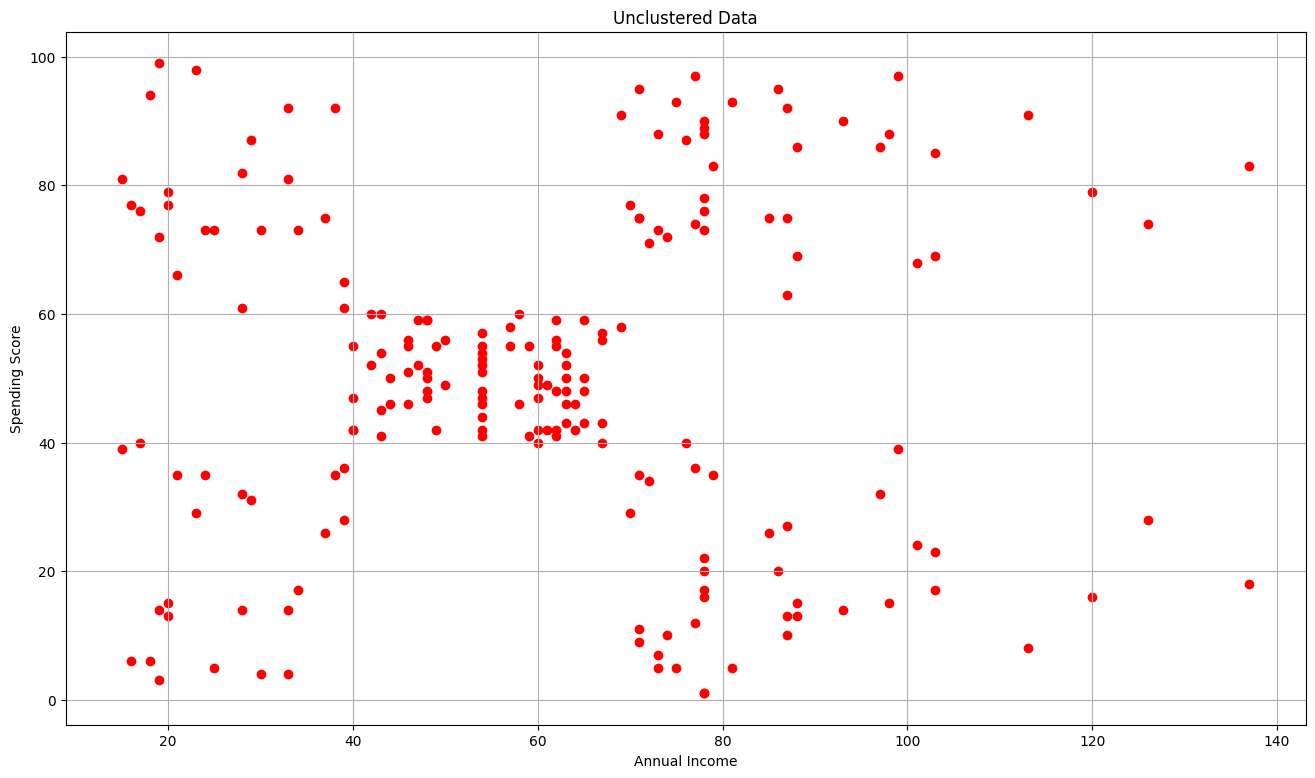

In [15]:
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'red', marker='o')

#### Elbow method

In [17]:
from sklearn.cluster import KMeans

In [28]:
km = KMeans(random_state=0, n_clusters=5,n_init='auto')

In [29]:
y = km.fit_predict(x)

In [30]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [31]:
km.inertia_

44448.4554479337

In [34]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x)
    sse.append(km.inertia_)

In [35]:
sse

[269981.28,
 185917.14253928518,
 106348.37306211118,
 73679.78903948836,
 44448.4554479337,
 38858.9599751439,
 31969.426550235476,
 29858.483597603947,
 22209.851608025543,
 20786.93669205916,
 18612.222868009678,
 17083.672501709316,
 16511.947370563896,
 15599.14833144512,
 14697.298899626936]

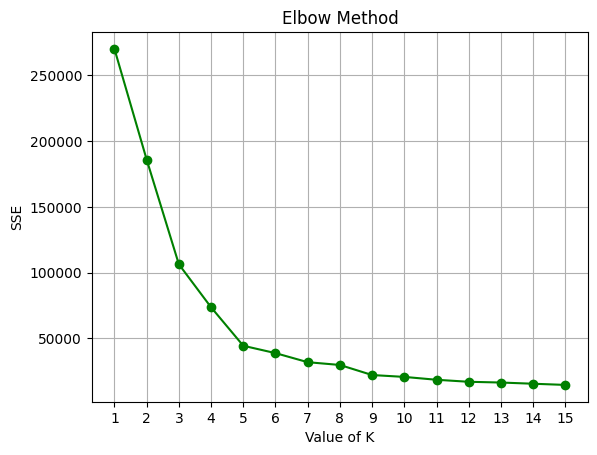

In [37]:
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, color='green', marker = 'o')

In [40]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [41]:
y = km.fit_predict(x)

In [42]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [43]:
cents = km.cluster_centers_
cents

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

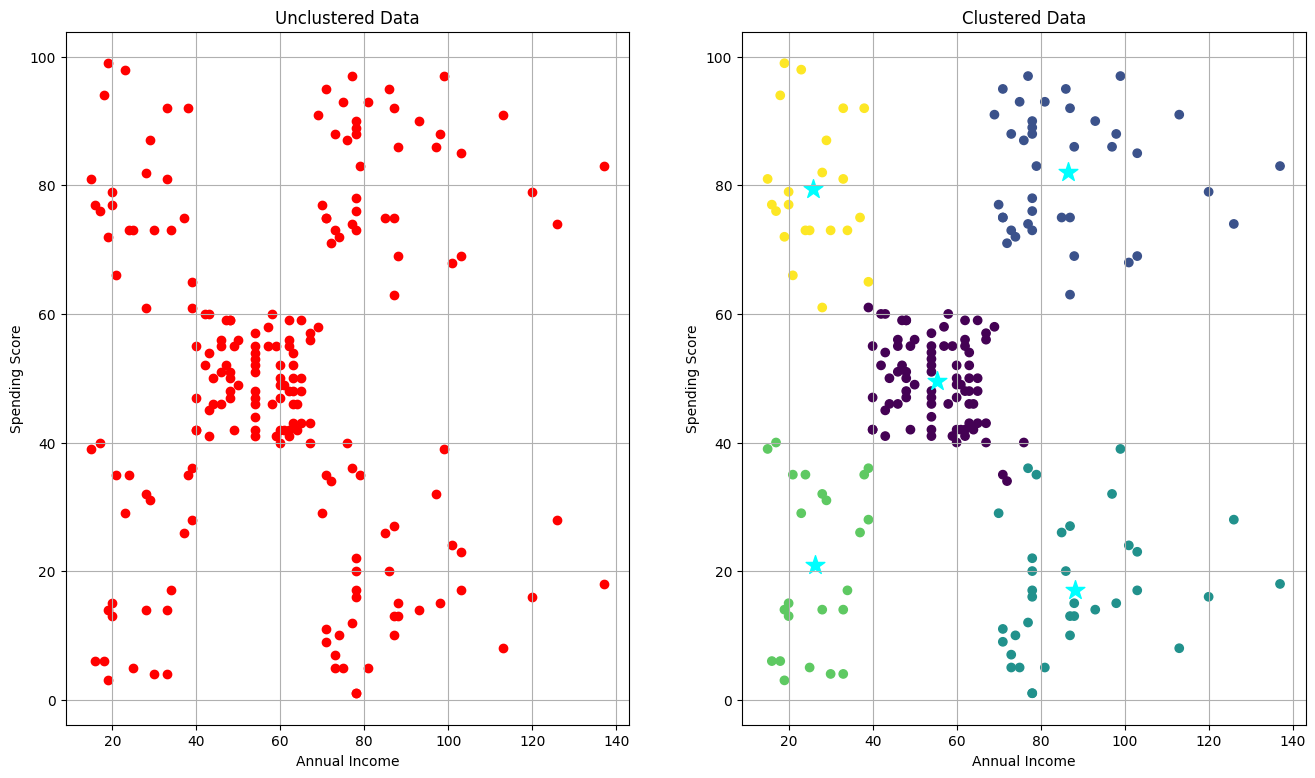

In [51]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'red', marker='o')

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], marker='o', c= y)
plt.scatter(cents[:,0], cents[:,1], s=200, color='cyan', marker='*')

#### Extract the clusters

In [55]:
zero = df[y==0]
one = df[y==1]
two = df[y==2]
three = df[y==3]
four = df[y==4]

In [57]:
print('Cluster-0: ', len(zero))
print('Cluster-1: ', len(one))
print('Cluster-2: ', len(two))
print('Cluster-3: ', len(three))
print('Cluster-4: ', len(four))

Cluster-0:  81
Cluster-1:  39
Cluster-2:  35
Cluster-3:  23
Cluster-4:  22


#### Save the clusters

In [59]:
zero.to_csv('zero.csv', index=True)

#### Predict the new data

In [61]:
new = pd.DataFrame([[34,17],[56,10],[104,45],[98,88]], columns=x.columns)

In [62]:
new

,Annual Income (k$),Spending Score (1-100)
0,34,17
1,56,10
2,104,45
3,98,88


In [63]:
km.predict(new)

array([3, 3, 2, 1], dtype=int32)

In [64]:
x['Cluster'] = y

/tmp/ipykernel_7769/2754855887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = y


In [67]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


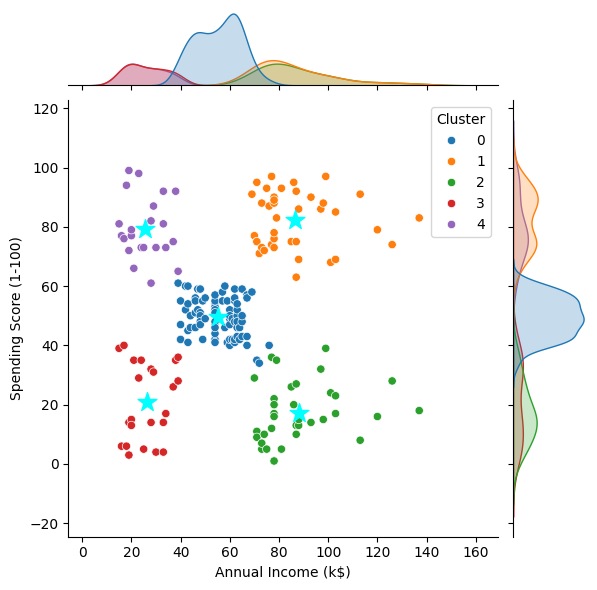

In [70]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
              data=x, hue='Cluster', palette='tab10')
plt.scatter(cents[:,0], cents[:,1], s=200, color='cyan', marker='*')

In [71]:
!pip install nltk textblob -U

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 944.9 kB/s eta 0:00:001m935.3 kB/s eta 0:00:01
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
